In [17]:
%matplotlib inline
import sys
sys.path.append("..")

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.tablogger import TabLogger

In [19]:
# load the file from the experiments directories

df = pd.DataFrame({})
for run in range(10):    
    fpath = os.path.join(
        "..",
        "experiments",
        "cifar100-vgg19_bn-minimal-run{}".format(run),
        "out",
        "epoch.out"
    )
    tlog = TabLogger(fpath, resume=True)
    tlog.close()

    # add the run column to the data dictionary
    dd = tlog.numbers
    dd["Run"] = ["Run{}".format(run)] * len(list(dd.values())[0])

    # concat the dataframe
    df = pd.concat([df, pd.DataFrame(dd)])

In [20]:
print(df)

     Epoch  Train Task Loss  Train Acc  Eval Task Loss  Eval Acc     LR   Run
0      0.0         4.606977      0.892        4.605457      0.97  0.100  Run0
1      1.0         4.604767      0.944        4.591987      1.45  0.100  Run0
2      2.0         4.545172      1.742        4.464416      1.92  0.100  Run0
3      3.0         4.445648      1.968        4.429829      2.31  0.100  Run0
4      4.0         4.426177      2.082        4.563364      1.51  0.100  Run0
..     ...              ...        ...             ...       ...    ...   ...
159  159.0         4.262070      2.934        4.268582      2.92  0.001  Run9
160  160.0         4.261290      2.806        4.264920      3.04  0.001  Run9
161  161.0         4.260386      2.870        4.270646      3.11  0.001  Run9
162  162.0         4.261424      2.880        4.269868      2.97  0.001  Run9
163  163.0         4.262332      2.926        4.272237      3.14  0.001  Run9

[1640 rows x 7 columns]


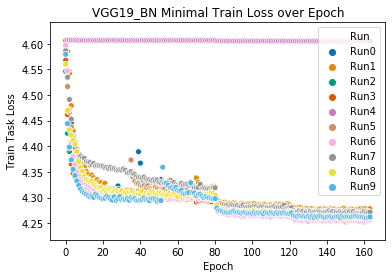

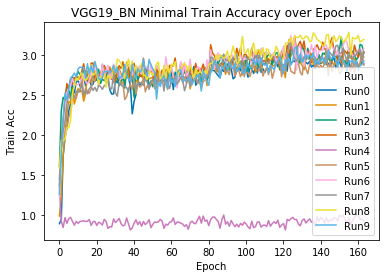

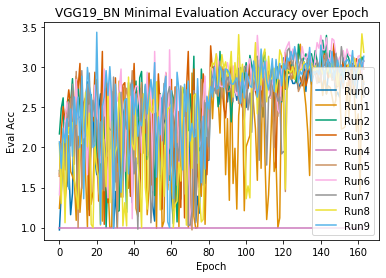

In [22]:
# plot in Seaborn
# plt.figure(figsize=(15, 6))


tl = sns.scatterplot(
    x="Epoch", y="Train Task Loss", hue="Run", data=df, palette="colorblind"
)
tl.set(title="VGG19_BN Minimal Train Loss over Epoch")

plt.savefig("train_loss-cifar100-vgg19_bn-minimal.png", dpi=200)
plt.show()
ta = sns.lineplot(
    x="Epoch", y="Train Acc", hue="Run", data=df, palette="colorblind"
)
ta.set(title="VGG19_BN Minimal Train Accuracy over Epoch")

plt.savefig("train_acc-cifar100-vgg19_bn-minimal.png", dpi=200)
plt.show()
ea = sns.lineplot(
    x="Epoch", y="Eval Acc", hue="Run", data=df, palette="colorblind"
)
ea.set(title="VGG19_BN Minimal Evaluation Accuracy over Epoch")

# g.set_yscale("log")
plt.savefig("eval_acc-cifar100-vgg19_bn-minimal.png", dpi=200)
plt.show()